<a href="https://colab.research.google.com/github/YashashGaurav/EDA-Indian-Startup-Analysis/blob/main/cleaning_and_combining_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the dataset uploaded on drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Disclaimer and working notes:
1. We downloaded all the data from the two sources and dumped it into the same folder that is referred by this code as `dataset_path`.
2. We renamed the file to `ISF_2021.csv` and `ISF_[month]_2022.csv` for our our convinience.
3. In the middle of our data cleaning process we realised that the data needed many corrections, so we did manual corrections to make the process faster using Google sheets. What and how many were those corrections? We only remember that it took us 2 hours worth of eyeballing Google Sheets. Sigh.

## Imports and consts

In [2]:
import os
from datetime import datetime

import glob
import numpy as np
import pandas as pd
import altair as alt

In [3]:
print(os.getcwd())
dataset_path = '/content/drive/MyDrive/Shared Documents/DSBD - Project 1 Shared Folder/dataset'

/content


## Load year 2021's data

In [4]:
isfd_2021 = pd.read_csv(dataset_path + '/ISF_2021.csv')
isfd_2021.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount(in dollars),Stage,Month
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000,Series B,12
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000,NaN,12
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000,Series B,12
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000,NaN,12
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000,Series A,12


## Load year 2022's data

In [5]:
joined_files_isfd_2022 = os.path.join(dataset_path, "*2022.csv")
joined_list_isfd_2022 = glob.glob(joined_files_isfd_2022)

isfd_2022 = pd.DataFrame()
content = []

for filename in joined_list_isfd_2022:
    df = pd.read_csv(filename, index_col=None, encoding='cp1252')
    # parse month data from file name
    df['funding_month'] = datetime.strptime(filename.split('/ISF_')[1].replace('_2022.csv', ''),"%B").month
    content.append(df)

isfd_2022 = pd.concat(content)
isfd_2022.head(5)

,Company Name,Founded,Location,Sector,What it does,Founders,Investor,Amount,Stage,funding_month
0,Dyte,2020,Bengaluru,IT Services and IT Consulting,Dyte provides the easiest way to add real-time...,"Felix Lee,Vivan",Multiples,"$15,300,000",undisclosed,4
1,Kirana Bazaar,2018,Gurgaon,Oline grocery,Kirana Bazaar is a neighborhood store network ...,"Abhishek Halder, Anilesh Yadav",Multiples,"$32,800,000",undisclosed,4
2,Phool,2017,kanpur,Enviromental Engineering,Phool is a biomaterial startup.,Ankit Agrawal,Multiples,"$9,400,000",undisclosed,4
3,Doceree,2019,Parsippany,Information Technology & Services,Doceree is a fully integrated programmatic ad ...,"Daleep Manhas, Harshit Jain, Stephen Hoelper",Multiples,"12,000,000",undisclosed,4
4,Acko,2016,Mumbai,Health insurance,Acko is a digital insurance company with a lic...,NaN,Multiples,"$458,000,000",Series D,4


## Merge datasets collected with consistent headings

In [6]:
print(f"ISF 2021 length- {len(isfd_2021)}")
print(f"ISF 2021 column names - {list(isfd_2021)}")

print(f"ISF 2022 length- {len(isfd_2022)}")
print(f"ISF 2022 column names - {list(isfd_2022)}")

ISF 2021 length- 1194
ISF 2021 column names - ['Company/Brand', 'Founded', 'Headquarters', 'Sector', 'What it does', 'Founder/s', 'Investor/s', 'Amount(in dollars)', 'Stage', 'Month']
ISF 2022 length- 446
ISF 2022 column names - ['Company Name', 'Founded', 'Location', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount', 'Stage', 'funding_month']


Rename columns to ensure they are the same and makes it easier to merge both dataframes

In [7]:
isfd_2021.rename(columns={
    'Company/Brand':'company_name', 
    'Founded': 'founded_year',
    'Headquarters': 'company_hq_location',
    'Sector': 'sector',
    'What it does':'company_description', 
    'Founder/s':'founders', 
    'Investor/s':'investor', 
    'Amount(in dollars)':'amount_usd',
    'Stage': 'funding_round',
    'Month': 'funding_month'
}, inplace=True)


isfd_2022.rename(columns={
    'Company Name':'company_name', 
    'Founded': 'founded_year', 
    'Location': 'company_hq_location', 
    'Sector': 'sector', 
    'What it does':'company_description', 
    'Founders': 'founders', 
    'Investor': 'investor', 
    'Amount': 'amount_usd', 
    'Stage': 'funding_round'
}
, inplace=True)

In [8]:
isfd_aggregated = isfd_2021.append(isfd_2022)
isfd_aggregated

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000,Series B,12
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000,NaN,12
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000,Series B,12
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000,NaN,12
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000,Series A,12
...,...,...,...,...,...,...,...,...,...,...
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


## Cleaning the dataset

Removing rows that do not have a company name

In [9]:
isfd_aggregated = isfd_aggregated[~isfd_aggregated['company_name'].isna()]

In [10]:
isfd_aggregated.isna().sum()

company_name             0
founded_year             1
company_hq_location      3
sector                   1
company_description      0
founders                24
investor                86
amount_usd              12
funding_round          528
funding_month            0
dtype: int64

In [11]:
isfd_aggregated.head(5)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000,Series B,12
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000,NaN,12
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000,Series B,12
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000,NaN,12
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000,Series A,12


Fixing funding amount issues

In [12]:
isfd_aggregated['amount_usd'].value_counts()

Undisclosed     165
1000000          51
2000000          40
10,00,000        33
3000000          30
               ... 
11,00,00,000      1
8,30,00,000       1
55,00,000         1
35,00,00,000      1
$39,000,000       1
Name: amount_usd, Length: 454, dtype: int64

In [13]:
#Remove the $ from records in the Amount column if present
diff_amounts = set()

def convert_amount(cell):
    if isinstance(cell, float):
        return cell
    
    cell = cell.replace(",", "")
    cell = cell.replace("$", "")
    cell = cell.lower()

    if cell.isalpha():
        diff_amounts.add(cell)
    return cell

isfd_aggregated.loc[:, 'amount_usd'] = isfd_aggregated['amount_usd'].apply(convert_amount)

print(diff_amounts)

{'seed', 'undisclosed', 'upsparks'}


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [14]:
len(isfd_aggregated)

1621

In [15]:
# testings how the operation above went
isfd_aggregated[~isfd_aggregated['amount_usd'].str.contains('$', na=True)]

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month


## Saving to file for intermediary dataset correction [IMP]

In [16]:
# commented to make sure files are not overwritten by mistake
# isfd_aggregated.to_csv(dataset_path + '/ISF_Consolidated_Final_2.csv', index=False)



---



---



## Loading dataset again for programatic cleaning

Here the Google Sheet. after manual cleaning, was downloaded in the `dataset_path` to and then cleaned programmatically again.

In [17]:
isfd_clean = pd.read_csv(dataset_path + '/ISF_Consolidated_Final_2_clean.csv')

In [18]:
isfd_clean.head(2)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000,Series B,12
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000,NaN,12


In [19]:
isfd_clean.columns

Index(['company_name', 'founded_year', 'company_hq_location', 'sector',
       'company_description', 'founders', 'investor', 'amount_usd',
       'funding_round', 'funding_month'],
      dtype='object')

## Programatic Cleaning

Some pointers that we notice from our visual analysis and fixing of the dataset that we exported:


We still need some programmatic cleaning of the dataset that need to be scripted:

1. Lowercase all amounts 
2. If amount_usd less than \$10,000, then multiply by 1 million to get correct value - We find this to be a trend in some of our files
3. Sector column - if second word ends with startup, then get rid of it.
4. Sector column - if second word is not capitalized, capitalize it
5. Add year column given how the data was loaded. We missed doing this initially and hence have to hack it together to see if this can be added post.
6. amount_usd column - some records have $ sig associated with them (This may be fixed already)
7. Programatically clean names of cities that we noticed needed mass cleaning else of the one of renaming that we did on google sheets
8. Throw out outlier funding values
9. Fix funding round data issues (in consistent naming)

### 1. Lowercase all amounts 

In [20]:
isfd_clean['amount_usd'] = isfd_clean['amount_usd'].str.lower()

### 2. If amount_usd less than \$10,000, then multiply by 1 million to get correct value - We find this to be a trend in some of our files

In [21]:
isfd_clean['amount_usd'].fillna('unavailable', inplace=True)

In [22]:
def scale_amount(val):
    try:
        float_val = float(val)
        if float_val < 10000.0:
            return float_val*(10**6)
        else:
            return(float_val)
    except ValueError:
        return val
        

isfd_clean['amount_usd'] = isfd_clean['amount_usd'].apply(scale_amount)


In [23]:
len(isfd_clean[isfd_clean['amount_usd'].isin(['undisclosed', 'unavailable'])]['amount_usd'])

184

In [24]:
isfd_clean['amount_usd'].str.isalpha().sum()

184

### 3. Sector column - if second word ends with startup, then get rid of the startup component


In [25]:
isfd_clean['sector'] = isfd_clean['sector'].replace('(?i)startup', '', regex=True)

In [26]:
isfd_clean.loc[
    isfd_clean['sector'].str.contains('(?i)startup', regex=True, na=False), 
    'sector'
]

Series([], Name: sector, dtype: object)

### 4. Sector column - Title case the words

In [27]:
isfd_clean['sector'] = isfd_clean['sector'].str.strip()

In [28]:
isfd_clean['sector'] = isfd_clean['sector'].str.title()

In [29]:
isfd_clean['sector'].value_counts()

Financial Services                   136
Fintech                              123
Edtech                               107
Information Technology & Services     85
Healthcare                            65
                                    ... 
Translation & Localization             1
Ai Chatbot                             1
Milk                                   1
Robotics                               1
D2C Business                           1
Name: sector, Length: 248, dtype: int64

### 5. Add year column given how the data was loaded. We missed doing this initially and hence have to hack it together to see if this can be added post.

As the order was preserved across all the operations above, we can confidently add a new column that states the year of these startups getting funded

In [30]:
# Last two rows of the 2021 table
isfd_2021[-2:]

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month
1192,KiranaKart,2020.0,Mumbai,E-commerce,A better model for instant grocery delivery in...,"Kaivalya Vohra, Aadit Palicha",Global Founders Capital,"7,20,000",Pre-seed,1
1193,Meddo,2018.0,Gurgaon,Healthcare,Meddo is an end-to-end medical services provider,Saurabh Kochhar,"growX ventures, Venture Gurukool","30,00,000",Pre-series A,1


In [31]:
# First two rows of the 2021 table
isfd_2022[:2]

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month
0,Dyte,2020,Bengaluru,IT Services and IT Consulting,Dyte provides the easiest way to add real-time...,"Felix Lee,Vivan",Multiples,"$15,300,000",undisclosed,4
1,Kirana Bazaar,2018,Gurgaon,Oline grocery,Kirana Bazaar is a neighborhood store network ...,"Abhishek Halder, Anilesh Yadav",Multiples,"$32,800,000",undisclosed,4


In [32]:
isfd_clean.loc[1192:1196]

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month
1192,KiranaKart,2020.0,Mumbai,E-Commerce,A better model for instant grocery delivery in...,"Kaivalya Vohra, Aadit Palicha",Global Founders Capital,720000.0,Pre-seed,1
1193,Meddo,2018.0,Gurgaon,Healthcare,Meddo is an end-to-end medical services provider,Saurabh Kochhar,"growX ventures, Venture Gurukool",3000000.0,Pre-series A,1
1194,Dyte,2020.0,Bengaluru,It Services And It Consulting,Dyte provides the easiest way to add real-time...,"Felix Lee,Vivan",Multiples,15300000.0,undisclosed,4
1195,Kirana Bazaar,2018.0,Gurgaon,Online Grocery,Kirana Bazaar is a neighborhood store network ...,"Abhishek Halder, Anilesh Yadav",Multiples,32800000.0,undisclosed,4
1196,Phool,2017.0,kanpur,Enviromental Engineering,Phool is a biomaterial startup.,Ankit Agrawal,Multiples,9400000.0,undisclosed,4


In [33]:
isfd_clean.loc[:1193, 'funding_year'] = 2021
isfd_clean.loc[1194:, 'funding_year'] = 2022
isfd_clean['funding_year'] = isfd_clean['funding_year'].astype(int)

In [34]:
isfd_clean.loc[1192:1196]

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
1192,KiranaKart,2020.0,Mumbai,E-Commerce,A better model for instant grocery delivery in...,"Kaivalya Vohra, Aadit Palicha",Global Founders Capital,720000.0,Pre-seed,1,2021
1193,Meddo,2018.0,Gurgaon,Healthcare,Meddo is an end-to-end medical services provider,Saurabh Kochhar,"growX ventures, Venture Gurukool",3000000.0,Pre-series A,1,2021
1194,Dyte,2020.0,Bengaluru,It Services And It Consulting,Dyte provides the easiest way to add real-time...,"Felix Lee,Vivan",Multiples,15300000.0,undisclosed,4,2022
1195,Kirana Bazaar,2018.0,Gurgaon,Online Grocery,Kirana Bazaar is a neighborhood store network ...,"Abhishek Halder, Anilesh Yadav",Multiples,32800000.0,undisclosed,4,2022
1196,Phool,2017.0,kanpur,Enviromental Engineering,Phool is a biomaterial startup.,Ankit Agrawal,Multiples,9400000.0,undisclosed,4,2022


### 6. check for $ and commas on amount_usd column

In [35]:
isfd_clean[isfd_clean['amount_usd'].str.contains('\$', na=False)]['amount_usd']

1279    $270,000,000
1285     $66,000,000
1602      $3,500,000
Name: amount_usd, dtype: object

In [36]:
def convert_amount(cell):
    if isinstance(cell, float):
        return cell
    
    if '$' in cell:
        cell = cell.replace(",", "")
        cell = cell.replace("$", "")
        return float(cell)
    else:
        return cell

isfd_clean.loc[:, 'amount_usd'] = isfd_clean['amount_usd'].apply(convert_amount)

In [37]:
isfd_clean[isfd_clean['amount_usd'].str.contains('\$', na=False)]['amount_usd']

Series([], Name: amount_usd, dtype: object)

### 7. Change names of cities to consistent names - Albiet we did clean a lot manually, we wanted to fix some using pandas as well

In [38]:
isfd_clean['company_hq_location'].replace({
    'Ahemdabad': 'Ahmedabad', 
    'Ahmadabad': 'Ahmedabad'}, inplace=True)

isfd_clean[isfd_clean['company_hq_location'].str.contains('Ah', na=False)].head(2)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
80,Ninety One,2015.0,Ahmedabad,Consumer Goods,"Ninety One makes cycles, which the company cla...","Sachin Chopra, Vishal Chopra",A91 Partners,30000000.0,Series A,12,2021
119,Petpooja,2011.0,Ahmedabad,Information Technology & Services,Petpooja is the largest next-generation PoS pl...,"Apurv Patel, Parthiv Patel","Aroa Ventures, GVFL, Udaan",4500000.0,NaN,11,2021


In [39]:
isfd_clean['company_hq_location'].replace({
    'Banglore': 'Bengaluru', 
    'Bangalore': 'Bengaluru',
    'Benglaru': 'Bengaluru'
    }, inplace=True)

isfd_clean[isfd_clean['company_hq_location'].str.contains('B', na=False)].head(2)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
2,Simpl,2015.0,Bengaluru,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Series B,12,2021
4,PayGlocal,2021.0,Bengaluru,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Series A,12,2021


In [40]:
isfd_clean['company_hq_location'].replace({
    'Gurgaon': 'Gurugram', 
    'Gurugram': 'Gurugram'}, inplace=True)

isfd_clean[isfd_clean['company_hq_location'].str.contains('Gur', na=False)].head(2)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
0,CollegeDekho,2015.0,Gurugram,E-Learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,12,2021
8,PlanetSpark,2017.0,Gurugram,Education Management,PlanetSpark is building the World Leader in Co...,"Maneesh Dhooper, Kunal Malik","Binny Bansal, Deep Kalra, Dr Ashish Gupta, Gok...",13000000.0,Series B,12,2021


In [41]:
isfd_clean['company_hq_location'] = isfd_clean['company_hq_location'].str.title()

### 8. Distribution analysis and outlier exclusion

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


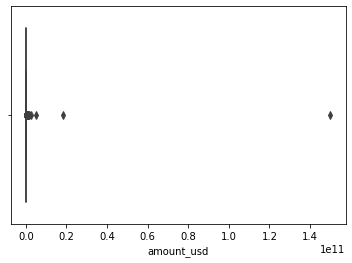

In [42]:
isfd_clean_2 = isfd_clean.copy(deep=True)

isfd_clean_2['amount_usd'] = isfd_clean_2['amount_usd'].replace({'undisclosed': np.nan, 'unavailable': np.nan})
isfd_clean_2 = isfd_clean_2.dropna(subset=['amount_usd'])
# change entries to floats
isfd_clean_2['amount_usd'] = isfd_clean_2['amount_usd'].astype(float)

# Box Plot
import seaborn as sns
sns.boxplot(isfd_clean_2['amount_usd'])

In [43]:
# as you can see that one point is skewing everything up, so we decided to redact it

isfd_clean_2[(isfd_clean_2['amount_usd'] > isfd_clean_2['amount_usd'].quantile(0.9999))]

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
944,Alteria Capital,2018.0,Mumbai,Fintech,Alteria Capital is a Venture debt firm .,Vinod Murali,NaN,1.500000e+11,Debt,4,2021


In [44]:
isfd_clean = isfd_clean[~isfd_clean['company_name'].str.contains('Alteria Capital')]

### 9. Funding round data issues


Convert 'series c' to 'Series C'\
Change 'Seies A' to 'Series A'\
Change 'seed' to 'Seed'\
Change 'Series-D' to 'Series D'\
Change 'Pre-seed' to 'Pre-Seed'\
Change 'Post-seed' to 'Post-Seed'\
Change 'Series B1' to 'Series B'\
Change 'Series B3' to 'Series B'\
Change 'Series F1' to 'Series F'\
Change 'Series F2' to 'Series F'\
Change 'Seed+' to 'Seed'\
Change 'Series D1' to 'Series D'\
Change 'Series A2' to 'Series A'\
Change 'Series A+' to 'Series A'\
Change 'Pre-series A' to 'Pre-Series A'\
Change 'Pre-series A1' to 'Pre-Series A'\
Change 'pre-series a' to 'Pre-Series A'\
Change 'Early seed' to 'Seed'\
Change 'Pre-series B' to 'Pre-Series B'\
Change 'Seed+' to 'Seed'    \
Change 'Series': 'Unknown',\
Change 'Pre-series': 'Unknown',\
Change np.NaN: 'Unknown'

In [45]:
# to change names and data points in funding_round
dict = {
    'series c':'Series C', 
    'Seies A':'Series A', 
    'seed':'Seed', 
    'Series-D':'Series D', 
    'Pre-seed':'Pre-Seed', 
    'Post-seed':'Post-Seed', 
    'Series B1':'Series B', 
    'Series B3':'Series B', 
    'Pre-series B':'Pre-Series B',
    'Series F1':'Series F',
    'Series F2':'Series F',
    'Series D1':'Series D',
    'Series A2':'Series A',
    'Series A+':'Series A',
    'Pre-series A':'Pre-Series A',
    'Pre-series A1':'Pre-Series A',
    'pre-series a':'Pre-Series A',
    'Early seed':'Seed',
    'Seed+':'Seed',
    'Series': 'Unknown',
    'Pre-series': 'Unknown',
    np.NaN: 'Unknown'
}

isfd_clean.replace({"funding_round": dict},inplace=True)
isfd_clean.head(20)

,company_name,founded_year,company_hq_location,sector,company_description,founders,investor,amount_usd,funding_round,funding_month,funding_year
0,CollegeDekho,2015.0,Gurugram,E-Learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Series B,12,2021
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,Unknown,12,2021
2,Simpl,2015.0,Bengaluru,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Series B,12,2021
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000.0,Unknown,12,2021
4,PayGlocal,2021.0,Bengaluru,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Series A,12,2021
5,Curefit,2016.0,Bengaluru,"Health, Wellness & Fitness",Tata Digital-backed Curefit,"Mukesh Bansal, Ankit",Zomato,145000000.0,Unknown,12,2021
6,Pocket FM,2018.0,Bengaluru,Ott,Pocket FM lets users discover and enjoy the gr...,"Rohan, Nishanth Srinivas, Prateek Dixit","Lightspeed, Times Group, Tanglin Venture Partners",22000000.0,Series B,12,2021
7,CHARGE+ZONE,2018.0,Vadodara,Automotive,CHARGE+ZONE is a tech-driven EV Charging infra...,Kartikey Hariyani,Venture Catalysts,10000000.0,Unknown,12,2021
8,PlanetSpark,2017.0,Gurugram,Education Management,PlanetSpark is building the World Leader in Co...,"Maneesh Dhooper, Kunal Malik","Binny Bansal, Deep Kalra, Dr Ashish Gupta, Gok...",13000000.0,Series B,12,2021
9,LenDenClub,2015.0,Mumbai,Financial Services,P2P lending platform delivering high returns o...,"Bhavin Patel, Dipesh Karki","Tuscan Ventures, Ohm Stock Brokers, Artha Vent...",10000000.0,Series A,12,2021


# Save for the last time!

In [46]:
isfd_clean.to_csv(dataset_path + '/ISF_Consolidated_Final_3.csv', index=False)

we should low-key publish this dataset on kaggle. super cool for open source EDAs 